In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets


### Read the dataset and perform exploratory data analysis over the dataset

In [18]:
# Loading the dataset
(X_train, y_train),(X_test, y_test) = datasets.fashion_mnist.load_data()

In [19]:
print(type(X_train))

<class 'numpy.ndarray'>


In [20]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
classes = [
'T-shirt/top'
,'Trouser'
,'Pullover'
,'Dress'
,'Coat'
,'Sandal'
,'Shirt'
,'Sneaker'
,'Bag'
,'Ankle boot']

In [5]:
def img_show(X, y, index):
    plt.figure(figsize=(3,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.show()

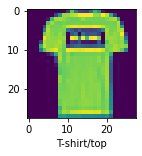

In [6]:
img_show(X_train, y_train, 1)

### Build a sequential model


In [7]:
# Normalizing the training data

X_train = X_train / 255
X_test = X_test / 255

# Flattening 2-dim array
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [21]:
y_train[0]

9

In [8]:
X_train.shape[1]

784

In [11]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [47]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10)
])

In [53]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                                                                                   metrics= ['accuracy'])

In [54]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1191 - accuracy: 0.7954
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4859 - accuracy: 0.8328
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4919 - accuracy: 0.8366: 0s - loss: 0.4941 - 
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4820 - accuracy: 0.8411
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4674 - accuracy: 0.8434
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4702 - accuracy: 0.8446
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4733 - accuracy: 0.8451
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4632 - accuracy: 0.8476
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4645 - accuracy: 0.8479
Epoch 10/10
1875/1875 [==============================] - 3s 

In [57]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5077 - accuracy: 0.8364


[0.5076500773429871, 0.8363999724388123]

In [63]:
y_pred = model.predict(X_test)

In [64]:
y_pred_classes = [np.argmax(a) for a in y_pred]
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1000
           1       0.99      0.95      0.97      1000
           2       0.73      0.72      0.73      1000
           3       0.83      0.85      0.84      1000
           4       0.76      0.66      0.71      1000
           5       0.98      0.89      0.94      1000
           6       0.52      0.69      0.59      1000
           7       0.89      0.97      0.93      1000
           8       0.98      0.94      0.96      1000
           9       0.95      0.93      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



In [65]:
print(confusion_matrix(y_test, y_pred_classes))

[[768   1  12  45   0   0 169   0   5   0]
 [  3 948   4  25  11   0   8   0   1   0]
 [ 10   0 722   9 115   0 143   0   1   0]
 [ 27  12  13 849  16   0  81   0   2   0]
 [  0   0 129  54 661   0 154   0   2   0]
 [  0   0   0   0   0 894  13  57   4  32]
 [111   0 104  32  61   0 685   0   7   0]
 [  0   0   0   0   0   8   2 972   2  16]
 [  1   0   1   5   1   1  51   2 938   0]
 [  0   0   0   0   0   6   1  66   0 927]]
